# Análisis Exploratorio de Datos (EDA)

Mediante la exploración detallada deL conjunto de datos proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV), se busca identificar patrones, tendencias y factores clave que contribuyen a la ocurrencia de siniestros y a la gravedad de sus consecuencias. Este análisis preliminar no solo sienta las bases para el diseño del dashboard y la definición de KPIs, sino que también ofrece perspectivas críticas que respaldarán la formulación de políticas efectivas y medidas preventivas para reducir el número de víctimas fatales en siniestros viales en la ciudad.

### Se importan las librerías necesarias para el proceso de EDA

In [61]:
# Importar librerías
import pandas as pd # Importa la librería pandas para el manejo de datos
import numpy as np # Importa la librería numpy para el manejo de datos
import calendar # Importa la librería calendar para trabajar con fechas
import locale # Importa la librería locale para configurar la configuración regional
import seaborn as sns # Importa la librería seaborn para la visualización de datos
import matplotlib.pyplot as plt # Importa la librería matplotlib.pyplot para la generación de gráficos
from datetime import datetime # Importa la clase datetime del módulo datetime para trabajar con fechas y horas
import warnings # Importa la función filterwarnings del módulo warnings para ignorar las advertencias
warnings.filterwarnings("ignore")
import utils # Script con funciones de ETL y EDA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Extracción de los datos desde un archivo xlsx, que contiene varias hojas (sheets), las de interés para el proyecto son HECHOS y VICTIMAS respectivamente. Se hará uso de algunas funciones de ETL y EDA recopiladas en el Script `utils.py`

In [62]:
hechos = pd.read_excel("data\homicidios.xlsx", sheet_name="HECHOS")

## Exploración Dataframe `hechos`

In [63]:
hechos.head()  # Visualizamos los primeros 5 registros

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [64]:
hechos.shape  # Tamaño del dataset

(696, 21)

In [65]:
# Eliminamos vacíos dado que exista un registro con todos sus datos vacíos
hechos = hechos.dropna(how="all")

# Eliminamos registros duplicados
hechos = hechos.drop_duplicates()  # Eliminamos duplicados

# Revisamos el tamaño del dataframe
hechos.shape

(696, 21)

Observaciones: 

* Se observa que no existen columnas y filas con todos sus valores vacíos o duplicados. 

### Verificamos el tipo de datos, y el total de nulos por columna en porcentaje.

In [66]:
utils.verificar_tipo_datos_y_nulos(hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
11,Altura,[<class 'float'>],18.53,81.47,567
12,Cruce,"[<class 'str'>, <class 'float'>]",75.43,24.57,171
13,Dirección Normalizada,"[<class 'str'>, <class 'float'>]",98.85,1.15,8
10,Calle,"[<class 'str'>, <class 'float'>]",99.86,0.14,1
19,VICTIMA,[<class 'str'>],100.00,0.00,0
18,PARTICIPANTES,[<class 'str'>],100.00,0.00,0
17,pos y,[<class 'str'>],100.00,0.00,0
16,pos x,[<class 'str'>],100.00,0.00,0
15,XY (CABA),[<class 'str'>],100.00,0.00,0
14,COMUNA,[<class 'int'>],100.00,0.00,0


Observaciones: 

* Es necesario renombrar columnas para manejar un solo formato de nombres de campos.
* Se elimina el campo ALTURA por tener una gran cantidad de nulos y no poder imputar.
* El campo cruce hace referencia a si es cruce o no, se imputan los valores vacíos con "No" y si efectivamente es un cruce con "Si".
* La columna "Dirección normalizada" se imputará con ayuda de la columna "lugar del hecho". 
* Las columnas 'HORA', 'HH' y 'Calle' presentan varios tipos de datos en la misma columna, por lo que se deben revisar cada uno y asignar un único tipo de dato.

### Renombrar columnas

In [67]:
# Renombramos columnas
hechos.rename(
    columns={
        "ID": "id",
        "N_VICTIMAS": "num_victimas",
        "FECHA": "fecha",
        "AAAA": "anio",
        "MM": "mes",
        "DD": "dia",
        "HORA": "hora",
        "HH": "franja_horaria",
        "LUGAR_DEL_HECHO": "lugar",
        "TIPO_DE_CALLE": "tipo_calle",
        "COMUNA": "comuna",
        "XY (CABA)": "punto_coordenado",
        "pos x": "longitud",
        "pos y": "latitud",
        "PARTICIPANTES": "participantes",
        "VICTIMA": "victima",
        "ACUSADO": "acusado",
        "Dirección Normalizada": "direccion_normalizada",
        "Calle": "calle",
        "Altura": "altura",
        "Cruce": "cruce",
    },
    inplace=True,
)

In [68]:
# Observamos las columnas renombradas
hechos.columns

Index(['id', 'num_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora',
       'franja_horaria', 'lugar', 'tipo_calle', 'calle', 'altura', 'cruce',
       'direccion_normalizada', 'comuna', 'punto_coordenado', 'longitud',
       'latitud', 'participantes', 'victima', 'acusado'],
      dtype='object')

### Eliminación de columna `altura`, debido al alto número de valores nulos

In [69]:
# Eliminar la columna ALTURA
hechos = hechos.drop(["altura"], axis=1)

### Imputación de datos nulos en la columna `cruce`, los vacíos se cambian por "No" y los demás por "Si"

In [70]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
hechos["cruce"] = np.where(hechos["cruce"].notnull(), "Si", "No")
hechos["cruce"]

0      Si
1      Si
2      No
3      Si
4      Si
       ..
691    Si
692    Si
693    Si
694    No
695    No
Name: cruce, Length: 696, dtype: object

### Imputación de datos nulos en la columna `direccion_normalizada`, los vacíos se cambian por "Sin dato", debido a que no hay información que permita completar de forma acertada estos datos faltantes, aunque solo representan un 1% del dataset, no se considera eliminar sus registros para preservar la mayor información posible

In [71]:
# Se rellenan nulos con SD
hechos["direccion_normalizada"].fillna("SD", inplace=True)

# Se verifican los datos imputados
hechos[hechos["direccion_normalizada"] == "SD"]["direccion_normalizada"]

38     SD
106    SD
119    SD
180    SD
181    SD
313    SD
546    SD
621    SD
Name: direccion_normalizada, dtype: object

### Tipos de variables (hora, franja_horaria, calle)

### hora

In [72]:
# Cantidad de valores por tipo de dato en la columna 'hora'
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

Conclusión
- Dado que la mayoría de los datos son del tipo datetime.time, se decide convertir todos a este tipo de dato.

In [73]:
# Se cambia el tipo de dato
hechos["hora"] = hechos["hora"].apply(
    lambda x: utils.convertir_a_time(x)
)  # Se usa la función convertir_a_time de Utils

# Se verifica la cantidad de valores por tipo de dato en la columna 'hora'
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

Se observa cuál es el registro que presenta NoneType 

In [74]:
hechos[hechos["hora"].isna()]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Se imputa el valor de faltante con las horas más frecuentes del dataset, es decir la Moda

In [75]:
# Calcula la hora mas común
moda_hora = hechos["hora"].mode().iloc[0]

# Se reemplaza el valor None por la hora más común
hechos["hora"].fillna(moda_hora, inplace=True)

# Se verifica el tipo de dato para la columna
hechos["hora"].apply(type).value_counts()

hora
<class 'datetime.time'>    696
Name: count, dtype: int64

Ya todos los datos son del tipo datetime.time

### franja_horaria

In [76]:
# Cantidad de valores por tipo de dato en la columna 'hora'
hechos["franja_horaria"].apply(type).value_counts()

franja_horaria
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [77]:
# Observamos el valor que es string
hechos[hechos["franja_horaria"] == "SD"]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [78]:
# Cambiamos el valor de la franja_horaria de SD a el entero de la columna 'hora'
hechos.loc[518, "franja_horaria"] = 9

# Verificamos el cambio hecho
hechos["franja_horaria"].apply(type).value_counts()

franja_horaria
<class 'int'>    696
Name: count, dtype: int64

Ya todos los datos son del tipo integer

### calle

In [79]:
# Cantidad de valores por tipo de dato en la columna 'hora'
hechos["calle"].apply(type).value_counts()

calle
<class 'str'>      695
<class 'float'>      1
Name: count, dtype: int64

In [80]:
# Observamos el registro que al parecer era float y vemos que corresponde a NaN
valor_float = hechos[hechos["calle"].apply(lambda x: isinstance(x, (int, float)))]
valor_float

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,No,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [81]:
# Cambiamos el registro vacío de la columna `calle` por el valor "Sin dato"
hechos.loc[119, "calle"] = "SD"

# Verificamos el cambio hecho
hechos["calle"].apply(type).value_counts()

calle
<class 'str'>    696
Name: count, dtype: int64

Ya todos los datos son del tipo string

### Verificamos nuevamente todas la columnas

In [82]:
utils.verificar_tipo_datos_y_nulos(hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,[<class 'str'>],100.0,0.0,0
1,num_victimas,[<class 'int'>],100.0,0.0,0
18,victima,[<class 'str'>],100.0,0.0,0
17,participantes,[<class 'str'>],100.0,0.0,0
16,latitud,[<class 'str'>],100.0,0.0,0
15,longitud,[<class 'str'>],100.0,0.0,0
14,punto_coordenado,[<class 'str'>],100.0,0.0,0
13,comuna,[<class 'int'>],100.0,0.0,0
12,direccion_normalizada,[<class 'str'>],100.0,0.0,0
11,cruce,[<class 'str'>],100.0,0.0,0


Conclusiones:

* Se normalizó los nombres de las columnas
* Se dejó un solo tipo de dato para cada columna
* Se eliminaron o imputaron datos nulos

## Diccionario de datos

| Variables     | Descripción                                                                                      |
|------------------------------|--------------------------------------------------------------------------------------------------|
| id                           | Identificador único del siniestro                                                              |
| num_victimas                   | Cantidad de víctimas                                                                            |
| fecha                        | Fecha en formato dd/mm/aaaa                                                                     |
| anio                         | Año                                                                                              |
| mes                          | Mes                                                                                              |
| dia                           | Día del mes                                                                                      |
| hora                         | Hora del siniestro                                                                              |
| franja_horaria                           | Franja horaria entera                                                                           |
| lugar              | Dirección del hecho                                                                             |
| tipo_calle                | Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía  |
| calle                        | Nombre de la arteria donde se produjo el hecho                                                  |
| Cruce                        | Cruce en caso de que sea una encrucijada                                                        |
| direccion_normalizada        | Dirección en formato normalizado USIG                                                           |
| comuna                       | Comuna de la ciudad (1 a 15)                                                                    |
| punto_coordenado                    | Geocodificación plana                                                                           |
| longitud                      | Longitud con separador punto. WGS84                                                             |
| latitud                        | Latitud con separador punto. WGS84                                                              |
| participantes                | Conjunción de víctima y acusado                                                                 |
| victima                      | Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos. |
| acusado                      | Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal        |
                                      


### Revisión categorías `acusado` y `victima`

Teniendo la siguiente información:

| Variables      | Valores      | Descripción                                                                                                                                                                                                                                                                                                                                                                                                          |
|----------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|                                                                                                   
| VICTIMA        | PEATON       | Víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a. Se incluyen los ocupantes o personas que empujan o arrastran un coche de bebé o una silla de ruedas o cualquier otro vehículo sin motor de pequeñas dimensiones. Se incluyen también las personas que caminan empujando una bicicleta o un ciclomotor.                                      |
|                | MOTO         | Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo.                                                                                                                                                                                                                                                                                                                                     |
|                | AUTO         | Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc).                                                                                                                                                                                                                                |
|                | CARGAS       | Vehículo a motor destinado al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).                                                                                                                                                                              |
|                | BICICLETA    | Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor.                                                                                                                                                                                          |
|                | PASAJEROS    | Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia.                                                                                                                                                                                                                                                    |
|                | MOVIL        | Vehículos de emergencia: móviles policiales, ambulancias, autobombas.                                                                                                                                                                                                                                                                                                                                               |
|                | OTRO         | Otros vehículos.                                                                                                                                                                                                                                                                                                                                      |
|                | SD           | Sin datos sobre el tipo de víctima.                                                                                                                                                                                                                                                                                                                   |
| ACUSADO        | AUTO         | Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc).                                                                                                                                                                                                                                |
|                | BICICLETA    | Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor.                                                                                                                                                                                          |
|                | CARGAS       | Vehículo a motor destinado al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).                                                                                                                                                                              |
|                | MOTO         | Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo.                                                                                                                                                                                                                                                                                                                                     |
|                | OBJETO FIJO  | Colisión contra objetos inmóviles fijados de manera permanente o semipermanente (columna, árbol, semáforo, etc.) o pérdidas de equilibrio de vehículos de dos ruedas que desencadenen la caída de sus ocupantes.                                                                                                                                                                                                       |
|                | PASAJEROS    | Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia.                                                                                                                                                                                                                                                    |
|                | TREN         | Equipo móvil que se desplaza exclusivamente sobre rieles.                                                                                                                                                                                                                                                                                              |
|                | OTRO         | Otros vehículos.                                                                                                                                                                                                                                                                                                                                      |
|                | SD           | Sin datos sobre el vehículo participante.                                                                                                                                                                                                                                                                                                             |
| PARTICIPANTES  | MULTIPLE     | Cuando participan más de un vehículo como contraparte de la víctima.                                                                                                                                                                                                                                                                                   |


Es necesario comparar la información de las tablas anteriores (diccionarios de datos), con los registros del dataset `homicidios` para los campos `acusado` y `victima`

In [83]:
hechos["victima"].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

Observación:

* Se observan dos categorías en el dataset que no se encuentran el diccionario de datos para la columna `victima`: 'OBJETO FIJO', 'PEATON_MOTO'

Se observan los registros:

In [84]:
hechos[hechos["victima"].isin(["OBJETO FIJO", "PEATON_MOTO"])]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se observan dos registros, uno por cada término distinto al del diccionario de datos. Se decide imputar el valor 'OTRO' dado que no hay información suficiente que pueda indicar el vehículo de la victima.

In [85]:
# Se cambia por el valor 'OTRO'
hechos["victima"] = hechos["victima"].replace(
    {"OBJETO FIJO": "OTRO", "PEATON_MOTO": "OTRO"}
)

# Se verifican los registros
hechos[hechos["id"].isin(["2017-0108", "2020-0063"])]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,Si,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


### Variables Geográficas

Durante los análisis anteriores, se observó que hay faltantes de información geográfica en las columnas `punto_coordenado`, `longitud'` y `latitud`

In [86]:
# Se observan los registros con valores "Point (. .)"
hechos[hechos["punto_coordenado"] == "Point (. .)"]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,No,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",No,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,No,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,No,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,No,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",No,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,No,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,No,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,No,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


In [88]:
# Se observan la cantidad de los registros con valores "Point (. .)"
hechos["punto_coordenado"][hechos["punto_coordenado"] == "Point (. .)"].count()

14

En total 14 registros no presentan las coordenadas planas del hecho y también se ven 10 registros que tampoco presentan los datos 'Pos x' y 'Pos y'. Dado el alcance de este proyecto, se imputarán estos valores como 0.0 de modo tal que se puedan identificar fácilmente para un gráfico de tipo mapa y excluirlos. 

In [89]:
# Se reemplazan los valores faltantes por 0
hechos["longitud"] = hechos["longitud"].replace(".", 0)
hechos["latitud"] = hechos["latitud"].replace(".", 0)
hechos["punto_coordenado"] = hechos["punto_coordenado"].replace("Point (. .)", 0)

In [95]:
# Se verifican los cambios en un registro
hechos[hechos["id"] == "2016-0136"]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No,SD,4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


## Exploración Dataframe `victimas`

In [96]:
# Lectura del dataset victimas
victimas = pd.read_excel("data\homicidios.xlsx", sheet_name="VICTIMAS")

In [97]:
victimas.head()  # Visualizamos los primeros 5 registros

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [98]:
victimas.shape  # Tamaño del dataset

(717, 10)

In [99]:
# Eliminamos vacíos dado que exista un registro con todos sus datos vacíos
victimas = victimas.dropna(how="all")

# Eliminamos registros duplicados
victimas = victimas.drop_duplicates()  # Eliminamos duplicados

# Revisamos el tamaño del dataframe
victimas.shape

(717, 10)

Observaciones: 

* Se observa que no existen columnas y filas con todos sus valores vacíos o duplicados. 

### Verificamos el tipo de datos, y el total de nulos por columna en porcentaje.

In [100]:
utils.verificar_tipo_datos_y_nulos(victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID_hecho,[<class 'str'>],100.0,0.0,0
1,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,AAAA,[<class 'int'>],100.0,0.0,0
3,MM,[<class 'int'>],100.0,0.0,0
4,DD,[<class 'int'>],100.0,0.0,0
5,ROL,[<class 'str'>],100.0,0.0,0
6,VICTIMA,[<class 'str'>],100.0,0.0,0
7,SEXO,[<class 'str'>],100.0,0.0,0
8,EDAD,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
9,FECHA_FALLECIMIENTO,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0,0


Observaciones: 

* Es necesario renombrar columnas para manejar un solo formato de nombres de campos.
* No hay valores nulos en el dataset.
* Las columnas 'EDAD', 'FECHA_FALLECIMIENTO' presentan varios tipos de datos en la misma columna, por lo que se deben revisar cada uno y asignar un único tipo de dato.

In [101]:
victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [104]:
# Renombramos columnas
victimas.rename(
    columns={
        "ID_hecho": "id",
        "FECHA": "fecha",
        "AAAA": "anio",
        "MM": "mes",
        "DD": "dia",
        "ROL": "rol",
        "VICTIMA": "victima",
        "SEXO": "sexo",
        "EDAD": "edad",
        "FECHA_FALLECIMIENTO": "fecha_fallecido",
    },
    inplace=True,
)

Las columnas 'edad' y 'fecha_fallecido' presentan varios tipos de datos en la misma columna, por lo que se deben revisar cada uno y asignar un único tipo de dato. 

### Tipos de variables (edad, feche_fallecido)

### edad

In [106]:
# Cantidad de valores por tipo de dato en la columna 'edad'
victimas["edad"].apply(type).value_counts()

edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

Conclusión
- La mayoría de los datos son del tipo integer, lo cual tiene mucho sentido, al tratarse de una variable numérica.
- Se deben revisar los datos tipo string

In [107]:
victimas[victimas["edad"].apply(lambda x: isinstance(x, str))]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecido
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Observaciones:

* Se observa que los datos tipo string corresponden a la edad no conocida de las victimas, por lo tanto presentan el valor 'SD'
* Se decide imputar los datos no conocidos de edad, basados en el sexo y en la edad más frecuente (moda)

Primero se imputan los valores de la columna sexo, para luego imputar la edad según el sexo de cada victima

In [108]:
# Imputa valor mas frecuente (moda) en la columna sexo
utils.imputa_valor_frecuente(victimas, "sexo")

El valor mas frecuente es: MASCULINO


Se imputa la edad categorizando por sexo.

In [110]:
utils.imputa_edad_media_segun_sexo(victimas, "edad", "sexo")

La edad promedio de Femenino es 51 y de Masculino es 40


Se revisan algunos ejemplos imputados.

In [113]:
id_ejemplos = ["2016-0052", "2016-0077", "2020-0063"]
victimas[victimas["id"].isin(id_ejemplos)]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecido
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,MASCULINO,39,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,50,SD
602,2020-0063,2020-12-05,2020,12,5,PEATON,PEATON,MASCULINO,38,2020-12-05 00:00:00
603,2020-0063,2020-12-05,2020,12,5,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,21,2020-12-05 00:00:00


Se revisan los datos faltantes (SD), de los campos `rol` y `victimas`

In [116]:
print(
    f"La cantidad de valores SD en 'rol' es de {len(victimas[victimas['rol']=='SD'])}"
)
print(
    f"La cantidad de valores SD en 'victima' es de {len(victimas[victimas['victima']=='SD'])}"
)

La cantidad de valores SD en 'rol' es de 11
La cantidad de valores SD en 'victima' es de 9


Dado que no son demasiados datos, se decide imputar por el valor más frecuente (moda) del dataset para esos respectivos campos

In [117]:
# Imputa valor mas frecuente en la columna rol
utils.imputa_valor_frecuente(victimas, "rol")

El valor mas frecuente es: CONDUCTOR


In [118]:
# Imputa valor mas frecuente en la columna victima
utils.imputa_valor_frecuente(victimas, "victima")

El valor mas frecuente es: MOTO


Se revisan algunos registros

In [119]:
id_ejemplos = ["2016-0115", "2016-0174", "2016-0049"]
victimas[victimas["id"].isin(id_ejemplos)]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,fecha_fallecido
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD
89,2016-0115,2016-09-02,2016,9,2,CONDUCTOR,MOTO,MASCULINO,39,SD
141,2016-0174,2016-12-27,2016,12,27,CONDUCTOR,MOTO,MASCULINO,39,SD


Dado el objeto del presente proyecto que es encontrar patrones que permitan tomar decisiones para disminuir los accidentes viales fatales en Buenos Aires, se observa que la fecha de fallecimiento (`fecha_fallecido`), no aporta información relevante, por lo cual se decide eliminar del presente dataset `victimas`

In [120]:
victimas = victimas.drop("fecha_fallecido", axis=1)
victimas.head()

,id,fecha,anio,mes,dia,rol,victima,sexo,edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


### Verificamos nuevamente todas la columnas

In [121]:
utils.verificar_tipo_datos_y_nulos(victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,[<class 'str'>],100.0,0.0,0
1,fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,anio,[<class 'int'>],100.0,0.0,0
3,mes,[<class 'int'>],100.0,0.0,0
4,dia,[<class 'int'>],100.0,0.0,0
5,rol,[<class 'str'>],100.0,0.0,0
6,victima,[<class 'str'>],100.0,0.0,0
7,sexo,[<class 'str'>],100.0,0.0,0
8,edad,[<class 'int'>],100.0,0.0,0


Conclusiones:

* Se normalizó los nombres de las columnas
* Se dejó un solo tipo de dato para cada columna
* Se eliminaron o imputaron datos nulos (SD)

### Eliminación de columnas redundantes

Este conjunto de datos se unirá con el dataset `hechos`, se pueden eliminar las columnas 'fecha', 'anio', 'mes', 'dia' y 'victima', porque es la misma información que contiene `hechos`.

Ejemplo id = "2016-0003" : 

In [127]:
# Dataset hechos
hechos[hechos["id"] == "2016-0003"]

,id,num_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar,tipo_calle,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [128]:
# Dataset victimas
victimas[victimas["id"] == "2016-0003"]

,id,fecha,anio,mes,dia,rol,victima,sexo,edad
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


In [129]:
# Se eliminan las columnas repetidas
victimas = victimas.drop(["fecha", "anio", "mes", "dia", "victima"], axis=1)
victimas.columns

Index(['id', 'rol', 'sexo', 'edad'], dtype='object')

## Unión de los datasets `hechos` y `victimas`

In [133]:
# Se unen a través del método merge con prioridad la tabla victimas (left)
homicidios = victimas.merge(hechos, on="id", how="left")
homicidios.head()

,id,rol,sexo,edad,num_victimas,fecha,anio,mes,dia,hora,...,calle,cruce,direccion_normalizada,comuna,punto_coordenado,longitud,latitud,participantes,victima,acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Se verifican tipos de datos y nulos en el dataset compilado

In [134]:
utils.verificar_tipo_datos_y_nulos(homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,[<class 'str'>],100.0,0.0,0
12,tipo_calle,[<class 'str'>],100.0,0.0,0
21,victima,[<class 'str'>],100.0,0.0,0
20,participantes,[<class 'str'>],100.0,0.0,0
19,latitud,"[<class 'str'>, <class 'int'>]",100.0,0.0,0
18,longitud,"[<class 'str'>, <class 'int'>]",100.0,0.0,0
17,punto_coordenado,"[<class 'str'>, <class 'int'>]",100.0,0.0,0
16,comuna,[<class 'int'>],100.0,0.0,0
15,direccion_normalizada,[<class 'str'>],100.0,0.0,0
14,cruce,[<class 'str'>],100.0,0.0,0


In [137]:
# Se modifica el tipo de dato para latitud y longitud, dejándolos como tipo float

homicidios["latitud"] = homicidios["latitud"].astype(float)
homicidios["longitud"] = homicidios["longitud"].astype(float)

Cabe mencionar que punto_coordenado tienes dos tipos de dato, ya que unos valores son cero (0) es decir integer y otros valores son string, dado que tienen la siguiente configuración Point(x,y)

Se verifican tipos de datos y nulos nuevamente

In [138]:
utils.verificar_tipo_datos_y_nulos(homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,[<class 'str'>],100.0,0.0,0
12,tipo_calle,[<class 'str'>],100.0,0.0,0
21,victima,[<class 'str'>],100.0,0.0,0
20,participantes,[<class 'str'>],100.0,0.0,0
19,latitud,[<class 'float'>],100.0,0.0,0
18,longitud,[<class 'float'>],100.0,0.0,0
17,punto_coordenado,"[<class 'str'>, <class 'int'>]",100.0,0.0,0
16,comuna,[<class 'int'>],100.0,0.0,0
15,direccion_normalizada,[<class 'str'>],100.0,0.0,0
14,cruce,[<class 'str'>],100.0,0.0,0


In [139]:
# Observamos el tamaño
homicidios.shape

(717, 23)

Conclusiones: 
* No se presentan datos nulos en el dataset
* Todos los campos presentan un solo tipo de dato, exceptuando `punto_coordenado`
* Se estandarizaron todos los nombres de las columnas
* El dataset resultante presenta un tamaño de 717 registros con 23 columnas

## Análisis exploratorio de las variables categóricas y numéricas

### Variables categóricas

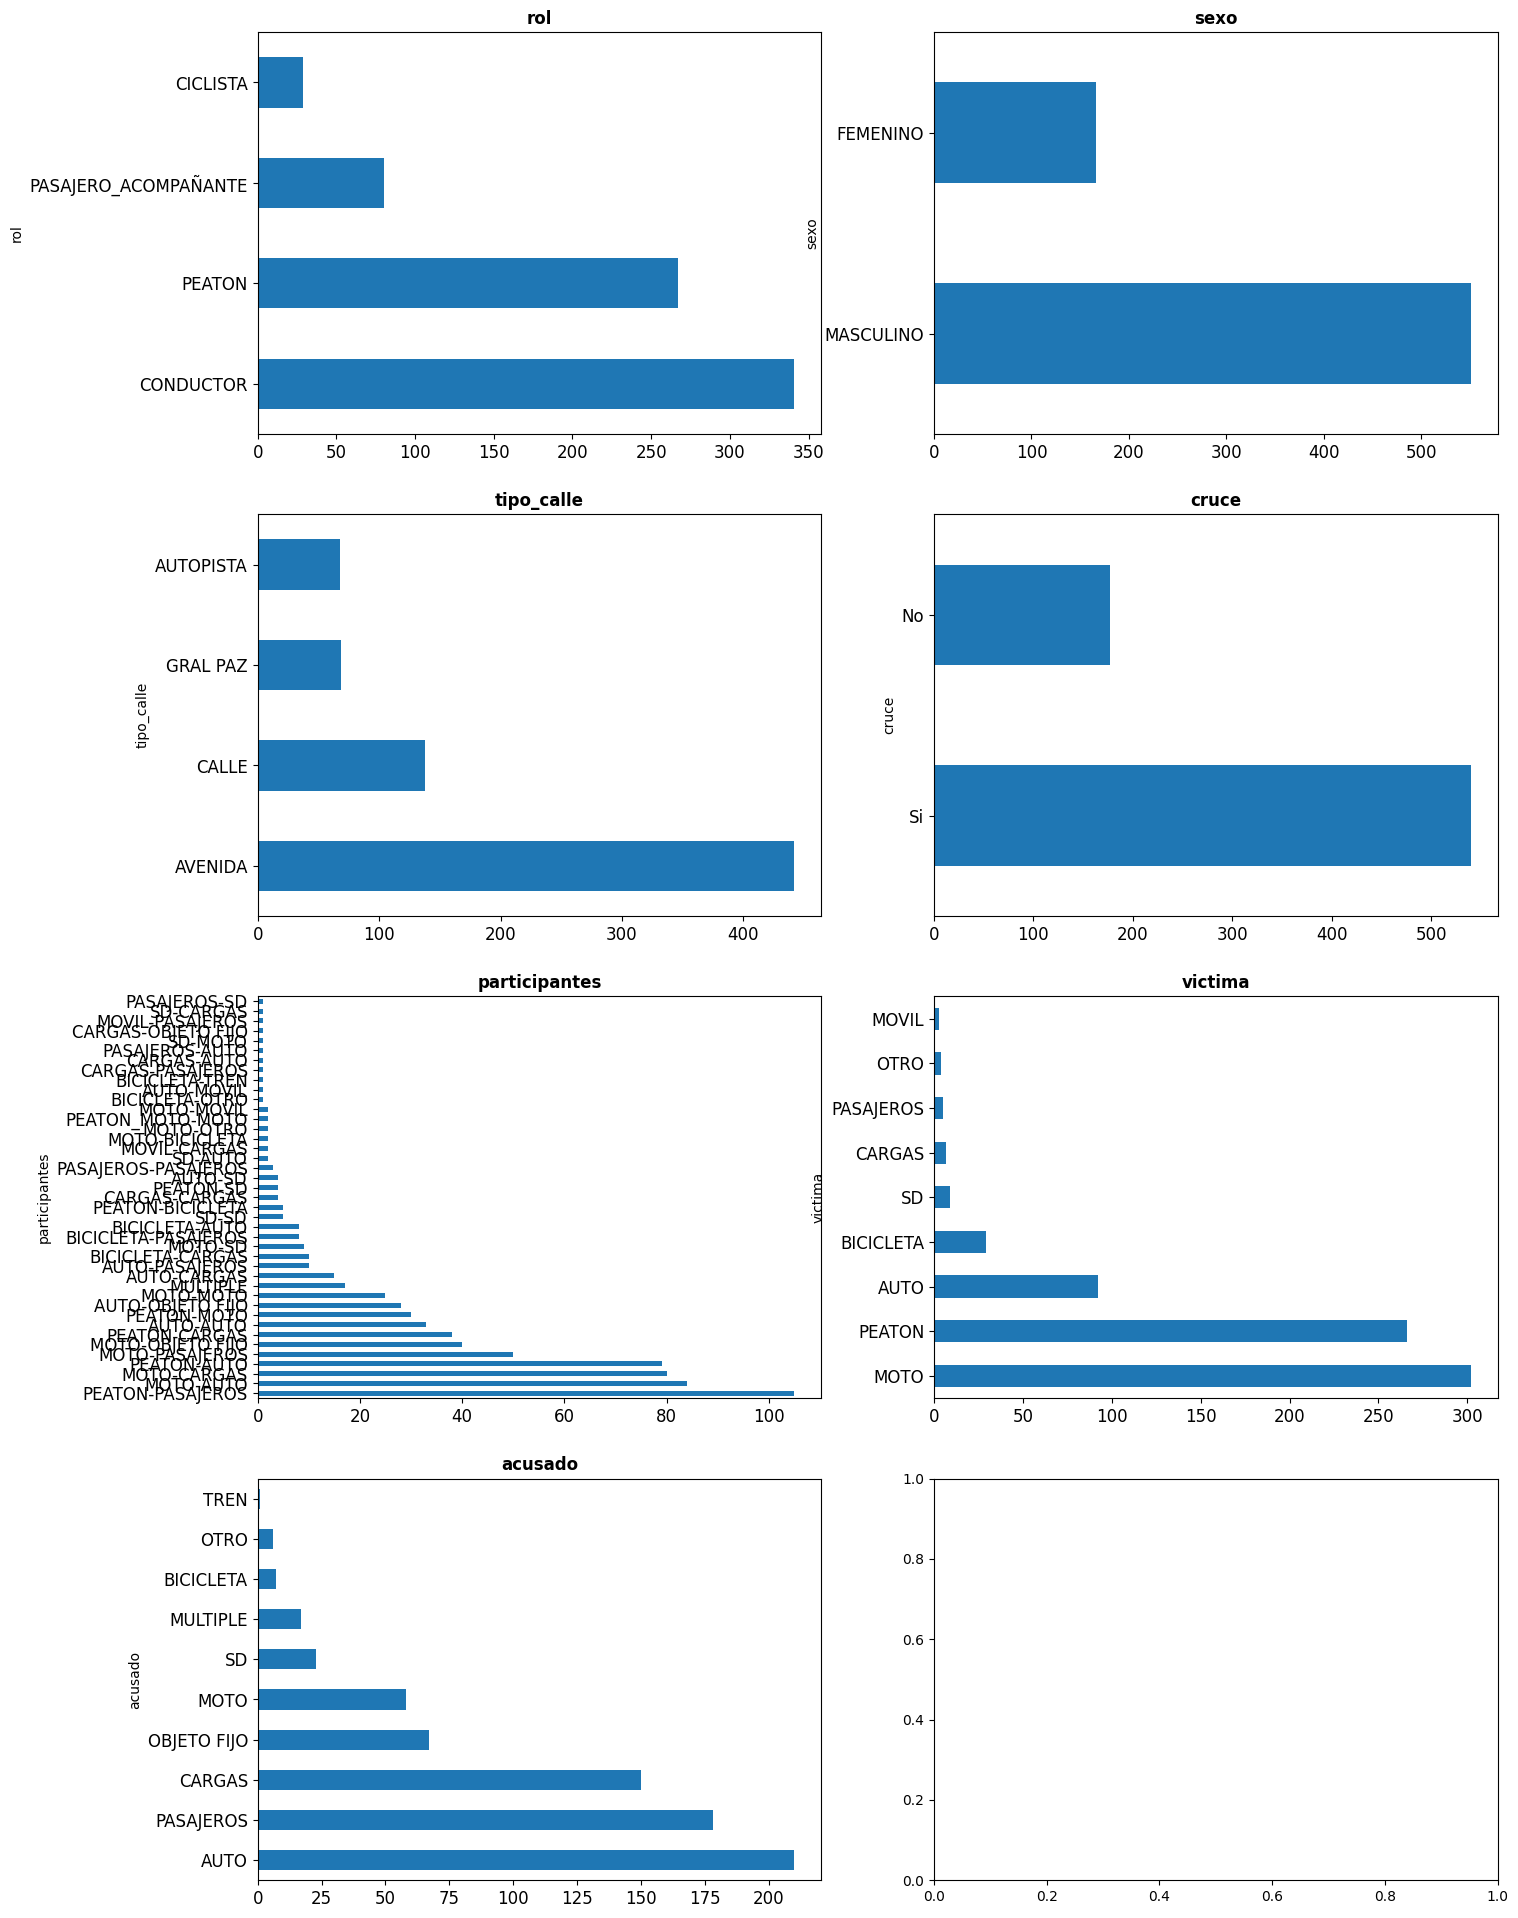

In [147]:
utils.graficos_eda_categoricos(
    homicidios.select_dtypes("O").drop(
        [
            "id",
            "hora",
            "franja_horaria",
            "calle",
            "direccion_normalizada",
            "punto_coordenado",
            "lugar",
        ],
        axis=1,
    )  # Se seleccionan las columnas cuyo datatype es Object y se excluyen algunas columnas que mostrarían ruido debido a que tienen muchos valores únicos
)

Conclusiones:

* Los mayores roles dentro de los accidentes viales son los Conductores y Peatones, los cuales representan más de la mitad del dataset, donde la mayoría son del Sexo MASCULINO y los accidentes en su mayoría se presentan en Avenidas y cruces, las victimas en normalmente son peatones o motos, y los acusados son AUTOS, PASAJEROS o CARGAS principalmente

### Variables numéricas

Para las variables numéricas se hará un análisis estadístico, que resuma y describa los campos

In [154]:
utils.estadisticos_cont(
    homicidios.select_dtypes("number").drop(
        ["longitud", "latitud"], axis=1
    )  # Se seleccionan las columnas cuyo datatype es number y se excluyen algunas columnas que no tendrían una relevancia estadisticamente hablando
)

,count,mean,median,std,min,25%,50%,75%,max
edad,717.0,42.101813,39.0,19.081623,1.0,28.0,39.0,55.0,95.0
num_victimas,717.0,1.061367,1.0,0.257024,1.0,1.0,1.0,1.0,3.0
anio,717.0,2018.174338,2018.0,1.672655,2016.0,2017.0,2018.0,2019.0,2021.0
mes,717.0,6.688982,7.0,3.575140,1.0,4.0,7.0,10.0,12.0
dia,717.0,15.953975,16.0,8.674876,1.0,9.0,16.0,23.0,31.0
comuna,717.0,7.430962,8.0,4.385067,0.0,4.0,8.0,11.0,15.0


Conclusiones:

* Un 75% de las victimas fatales pertenece a edades superiores a los 55 años
* El mayor número de victimas presentes en el dataset en un accidente fue de 3 personas
* El 2019 es el año donde se presentan más accidentes y representa el 75% de los datos
* El mes donde se presentan más accidentes dentro de los datos analizados es Octubre
* El día donde se presentaron más accidentes ha sido el 31, esto puede deberse al año nuevo.
* La comuna donde se presentan más accidentes durante todos los años del dataset es la #11

## Análisis exploratorio de los accidentes fatales

Se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las características de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

### Distribución mensual

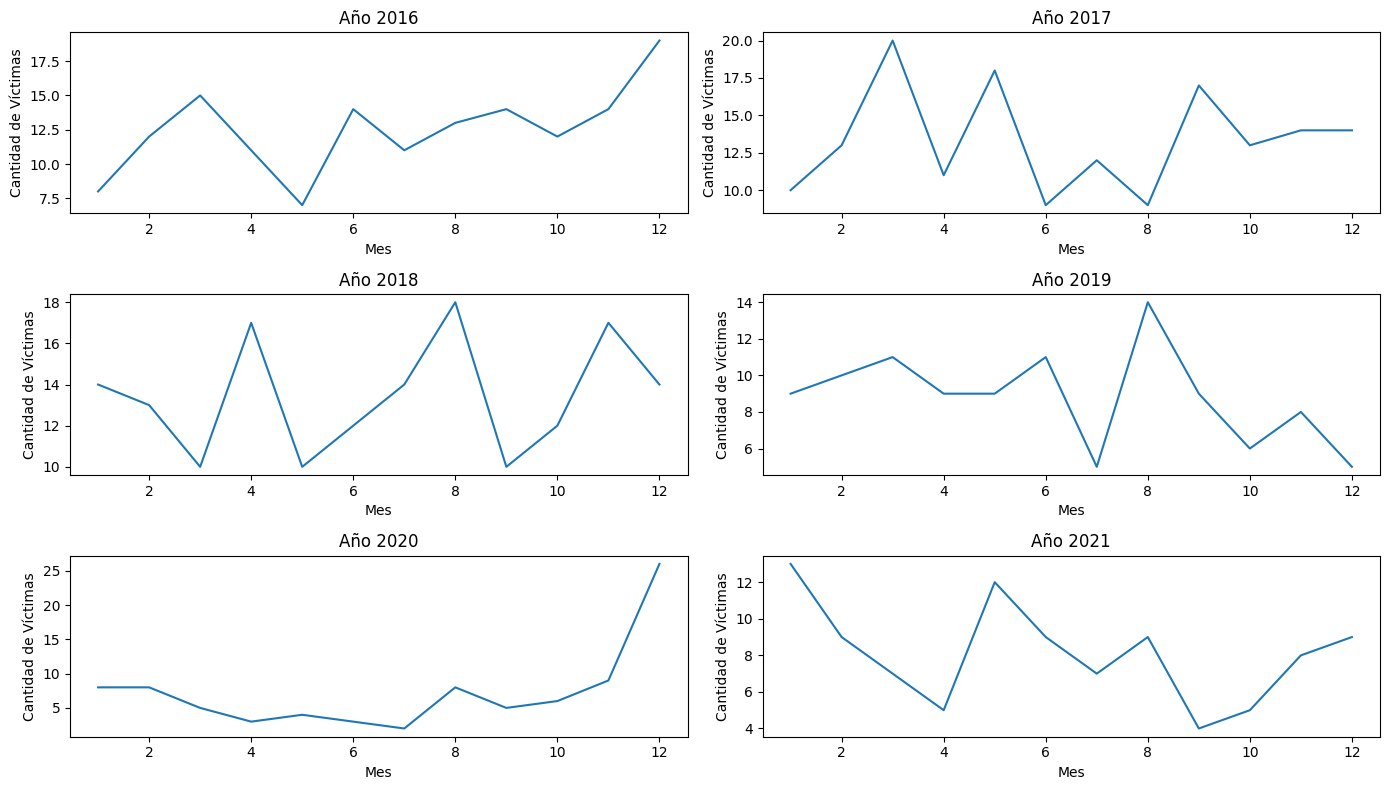

In [157]:
utils.accidentes_mensuales(homicidios, "anio", "mes")

Conclusiones: 

* No se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados.
* Hay disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19 en Argentina.

In [ ]:
utils.cantidad_victimas_mensuales(homicidios)